# Pymaceuticals Inc.
---

### Analysis

- Capomulin seems to be an effective drug for cancer, as mouse s185's tumor volume decreases as time goes by.

- There is a strong correlation between tumor volumne and weight of the mouses, meaning the heavier the mouse, the bigger the tumor.

- Capomulin mouses and Ramicane mouses have much lower tumor volume at the last timepoints, showing that they are more effective than the other drugs used in this experiment.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata.head()
study_results.head()

mouse_study_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
mouse_study_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
mouse_study_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [3]:
# Checking the number of mice.
mouse_study_df.nunique()["Mouse ID"]

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = mouse_study_df[mouse_study_df.duplicated()]
print(duplicated["Mouse ID"])

909    g989
Name: Mouse ID, dtype: object


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# for i in mouse_study_df:
#     if ["Mouse ID"] = "g989"
#     print()

g989_info = mouse_study_df[mouse_study_df.duplicated()]
g989_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_dropped_df = mouse_study_df.drop_duplicates()
mouse_study_dropped_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
mouse_study_dropped_df['Drug Regimen'].value_counts()['Ceftamin']

178

In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_study_dropped_df.nunique()["Mouse ID"]

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = mouse_study_dropped_df.groupby(['Drug Regimen']).mean()
# mean = mouse_study_dropped_df.loc[:,"Tumor Volume (mm3)"]
mean = mean.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites"],axis=1)
mean.rename(columns = {"Tumor Volume (mm3)":"Mean Tumor Volume"}, inplace=True)
mean

median = mouse_study_dropped_df.groupby(['Drug Regimen']).median()
median = median.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites"],axis=1)
median.rename(columns = {"Tumor Volume (mm3)":"Median Tumor Volume"}, inplace=True)
median

variance = mouse_study_dropped_df.groupby(['Drug Regimen']).var()
variance = variance.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites"],axis=1)
variance.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume variance"}, inplace=True)
variance

std_dev = mouse_study_dropped_df.groupby(['Drug Regimen']).std()
std_dev = std_dev.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites"],axis=1)
std_dev.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Std. Dev."}, inplace=True)
std_dev

std_err = mouse_study_dropped_df.groupby(['Drug Regimen']).sem()
std_err = std_err.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites","Mouse ID","Sex"],axis=1)
std_err.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Std. Err."}, inplace=True)
std_err

summary = pd.concat([mean, median, variance, std_dev, std_err], axis=1)
summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
mouse_study_dropped_grouped_df = mouse_study_dropped_df.groupby(['Drug Regimen'])
# summary = mouse_study_dropped_grouped_df.NormalDist()
summary

final_mouse_study = mouse_study_dropped_grouped_df[["Tumor Volume (mm3)"]].describe(include="all")
final_mouse_study

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  160.0  52.368318  6.502160  45.000000  47.107256   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.909965  56.259803  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

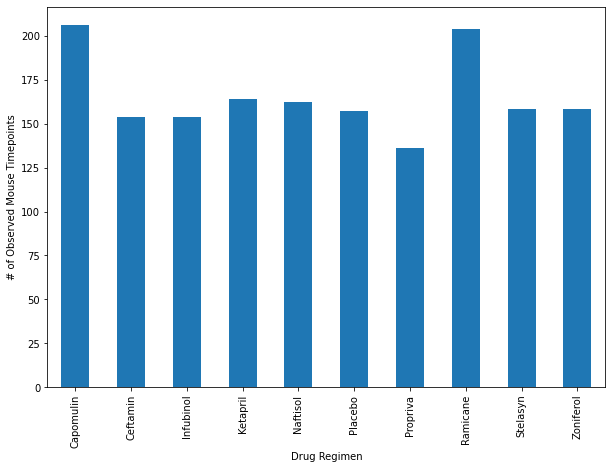

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

grouped_df = mouse_study_dropped_grouped_df.nunique()
# grouped_df
# no_of_unique = mouse_study_dropped_grouped_df["Tumor Volume (mm3)"]
# no_of_unique.to_frame()
# plt.bar(x_axis, no_of_unique, color='b', alpha=0.5, align="center")
# no_of_unique.plot(x="Drug Regimen",y='# of Observed Mouse Timepoints',kind='bar')

# grouped_df = mouse_study_dropped_df.groupby(['Drug Regimen'])
# # print(type(grouped_df))
grouped_df.plot.bar(y='Tumor Volume (mm3)',legend=False, figsize = (10,7))
plt.ylabel("# of Observed Mouse Timepoints")

Text(0, 0.5, '# of Observed Mouse Timepoints')

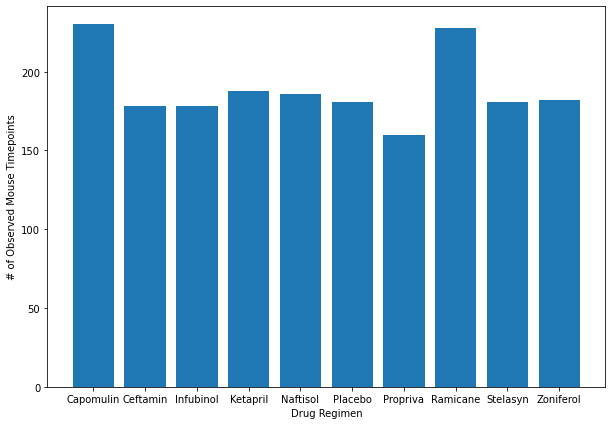

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# x = np.arange(len(mouse_study_dropped_grouped_df))

single_index = final_mouse_study.droplevel(0, axis=1)
single_index.columns

x = single_index.index

y = single_index["count"]

fig = plt.figure(figsize = (10, 7))
plt.bar(x, y)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


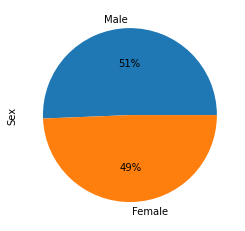

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_df = mouse_study_dropped_df["Sex"].value_counts()
male_female_df.plot(kind="pie",autopct="%1.0f%%")


Text(0, 0.5, 'Sex')

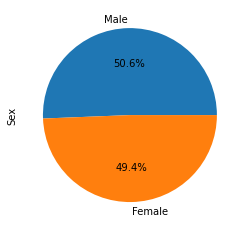

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_female_df,labels=male_female_df.index, autopct="%1.1f%%")
plt.ylabel(male_female_df.name)

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = mouse_study_dropped_df.groupby("Mouse ID").max()["Timepoint"]
last_tp_df = pd.DataFrame(last_tp)
last_tp_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_last_tp_df = pd.merge(last_tp_df, mouse_study_dropped_df, how="left", on=["Mouse ID","Timepoint"])
mouse_last_tp_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_treatment = mouse_last_tp_df.loc[mouse_last_tp_df["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    tumor_vol.append(drug_treatment)
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    quartiles = drug_treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_treatment.loc[(drug_treatment<lower_bound)|(drug_treatment>upper_bound)]
    
    print(f"{treatment}'s outliers are {outliers}'")

Capomulin's outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)'
Ramicane's outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)'
Infubinol's outliers are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64'
Ceftamin's outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)'


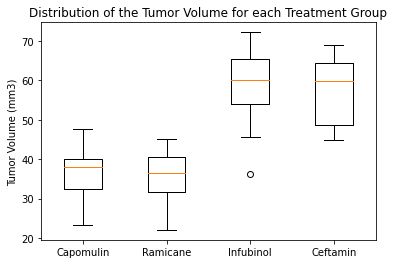

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Distribution of the Tumor Volume for each Treatment Group")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


## Line and Scatter Plots

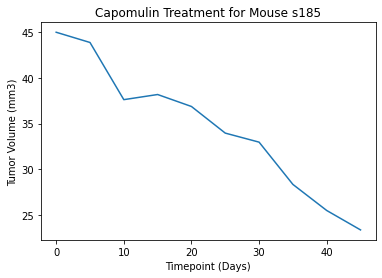

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = mouse_study_dropped_df.loc[(mouse_study_dropped_df["Drug Regimen"]=="Capomulin")]
mouse_capomulin = capomulin.loc[(mouse_study_dropped_df["Mouse ID"]=="s185")]
# mouse_capomulin

plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(mouse_capomulin["Timepoint"], mouse_capomulin["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment for Mouse s185")
plt.show()

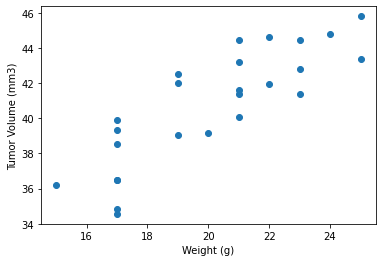

In [56]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = mouse_study_dropped_df.loc[(mouse_study_dropped_df["Drug Regimen"]=="Capomulin")]
# capomulin

capomulin_by_id = capomulin.groupby("Mouse ID").mean()

plt.scatter(capomulin_by_id["Weight (g)"], capomulin_by_id["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient is 0.8419363424694717.


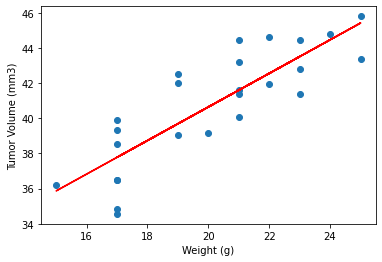

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr = capomulin_by_id["Weight (g)"].corr(capomulin_by_id["Tumor Volume (mm3)"])
print(f"The correlation coefficient is {corr}.")

x_values = capomulin_by_id["Weight (g)"]
y_values = capomulin_by_id["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
